<a href="https://colab.research.google.com/github/zaegeon/Python/blob/main/ML/20220620_ML07_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 경사하강법(Gradient Descent)

* 머신 러닝의 목적은 목적(비용, 손실) 함수를 최소로 만드는 계수들(w0, w1, ...)을 찾는 것.
* 회귀 문제인 경우 목적 함수는 MSE(w).
* 회귀 문제에서는 w에 대한 2차 함수에서 최솟값의 위치를 찾는 문제와 비슷.
* 경사 하강법 : 최솟값의 위치를 찾는 알고리즘 중 하나.
    * 목적 함수의 임의의 위치에서 시작
    * 그 위치에서의 접선의 기울기(gradient)를 계산하고, 접선의 기울기의 절댓값이 줄어드는 방향으로 w 값을 변경
        * 접선의 기울기가 양수인 경우 왼쪽으로
        * 접선의 기울기가 음수인 경우 오른쪽으로
    * 위 과정을 충분히 반복하면 목적함수가 최솟값이 되는 위치 w를 찾을 수 있음.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

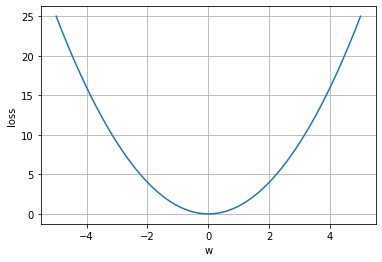

In [2]:
w = np.arange(-5, 5, 0.001) # [-5, -4.999, ... , 4.999, 5]
loss = w ** 2

plt.plot(w, loss)
plt.grid()
plt.xlabel('w')
plt.ylabel('loss')
plt.show()

In [3]:
# 임의의 w를 선택
w_init = -4

In [4]:
# 선택한 w에서 목적(손실)함수의 접선의 기울기 계산
grad = 2 * w_init

In [5]:
# 처음 위치에서 기울기의 반대 방향으로 약간 이동
w_next = w_init - grad * 0.1
w_next

-3.2

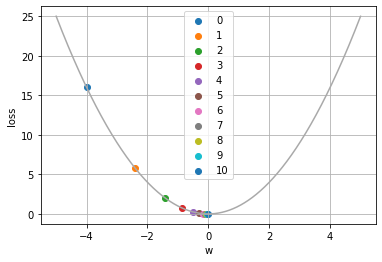

In [6]:
# 목적(손실, 비용) 함수 시각화
w = np.arange(-5, 5, 0.001)
loss = w ** 2
plt.plot(w, loss, color='darkgray')

# loss의 최솟값까지 이동하기 위해서 임의의 w에서 시작
w_init = -4
loss_init = w_init ** 2 # 임의의 시작값에서의 목적 함수 리턴값
plt.scatter(w_init, loss_init, label='0')

# 학습률 : gradient가 감소하는 방향으로 얼마나 빠르게 이동할 지를 결정하는 파라미터
learning_rate = 0.2
for n in range(1, 11): # 10번 반복
    # 현재 위치에서 gradient 계산
    grad = 2 * w_init
    # 현재 위치를 gradient가 감소하는 방향으로 약간 이동시킴.
    w_next = w_init - grad * learning_rate
    # 이동한 위치에서의 loss를 계산(목적함수 리턴값)
    loss_next = w_next ** 2
    plt.scatter(w_next, loss_next, label=f'{n}')
    # 다음 이동 위치를 계산하기 위해서 현재 위치를 바뀐 새 위치로 변경
    w_init = w_next

plt.legend()
plt.grid()
plt.xlabel('w')
plt.ylabel('loss')
plt.show()

__학습률(learning rate) 하이퍼 파라미터__

*  학습률이 너무 작은 경우에는 최솟값을 향해서 매우 천천히 움직임.
*  학습률이 너무 큰 경우에는 최솟값을 향해서 빠르게 또는 불안정하게 움직임.
*  학습률이 너무 작으면 최대 반복 횟수(max_iter) 안에서 최솟값으로 수렴(convergence)하지 못할 수도 있음.
    * 수렴할 때까지의 최대 반복 횟수를 늘려줌.
    * 학습률을 키워줌.
*  학습률이 너무 크면 수렴하지 못하고 발산(divergence)하는 경우가 생기기도 함.
    * 학습률을 줄여야 함.
*  ML 알고리즘 중에서는 처음에는 학습률을 크게 하고, 에포크(epoch, 반복)가 진행될 때마다 학습률을 점점 줄여나가는 방식으로 데이터를 학습하는 알고리즘도 있음.
    * 에포크 : 전체 훈련 셋에 대해서 gradient를 한 번씩 모두 계산하는 것.

# SGD(Stochastic Gradient Descent, 확률적 경사 하강법)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor, LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Fish dataset

In [8]:
# 데이터 셋 저장 경로
fish_csv = 'https://github.com/rickiepark/hg-mldl/raw/master/fish.csv'
fish = pd.read_csv(fish_csv)

In [9]:
# 농어(Perch) 데이터 
perch = fish[fish.Species == 'Perch']
perch.head()

,Species,Weight,Length,Diagonal,Height,Width
72,Perch,5.9,8.4,8.8,2.1120,1.4080
73,Perch,32.0,13.7,14.7,3.5280,1.9992
74,Perch,40.0,15.0,16.0,3.8240,2.4320
75,Perch,51.5,16.2,17.2,4.5924,2.6316
76,Perch,70.0,17.4,18.5,4.5880,2.9415


In [10]:
X = perch.iloc[:, 2:].values.copy()
y = perch['Weight'].values.copy()

In [11]:
X[:3]

array([[ 8.4   ,  8.8   ,  2.112 ,  1.408 ],
       [13.7   , 14.7   ,  3.528 ,  1.9992],
       [15.    , 16.    ,  3.824 ,  2.432 ]])

In [12]:
y[:3]

array([ 5.9, 32. , 40. ])

In [13]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, 
                                          test_size=0.25,
                                          random_state=42)

In [14]:
X_tr.shape, X_te.shape, y_tr.shape, y_te.shape

((42, 4), (14, 4), (42,), (14,))

In [15]:
sgd = SGDRegressor() # 모델 생성

In [16]:
sgd.fit(X_tr, y_tr) # 모델 훈련

SGDRegressor()

In [17]:
sgd.coef_

array([ 5.68459413e+09,  2.13149180e+09, -7.53659173e+09, -6.06727763e+09])

In [18]:
sgd.intercept_

array([2.77515432e+10])

In [19]:
tr_pred = sgd.predict(X_tr)
tr_pred[:5]

array([1.26359515e+11, 1.37238041e+11, 1.17269612e+11, 1.13671299e+11,
       1.93178307e+11])

In [20]:
sgd.score(X_tr, y_tr)

-2.2934780927837027e+17

훈련 셋의 샘플 개수가 너무 적어서 1,000번의 반복(epoch)만으로는 최적의 값으로 찾아갈 수 없었음.

해결 방법 :
*  최대 반복 횟수를 늘려줌.
*  학습률을 크게 만들어줌.
*  규제의 크기를 줄여줌.

In [21]:
sgd = SGDRegressor(max_iter=1_000_000, random_state=42)
sgd.fit(X_tr, y_tr)
sgd.score(X_tr, y_tr)

-4.016900437110443e+18

In [22]:
sgd = SGDRegressor(max_iter=1_000_000_000,
                   learning_rate='constant', eta0=1.0,
                   random_state=42)
sgd.fit(X_tr, y_tr)
sgd.score(X_tr, y_tr)

-2.795200441965098e+25

In [23]:
sgd = SGDRegressor(max_iter=1_000_000_000,
                   learning_rate='adaptive', eta0=1.0,
                   random_state=42)
sgd.fit(X_tr, y_tr)
sgd.score(X_tr, y_tr)

-4.3853566245453505e+19

In [24]:
sgd = SGDRegressor(max_iter=1_000_000_000, alpha=0,
                   learning_rate='adaptive', eta0=1.0,
                   random_state=42)
sgd.fit(X_tr, y_tr)
sgd.score(X_tr, y_tr)

-5.550094971151149e+19

# California 지역의 주택 가격 데이터 셋

In [25]:
from sklearn.datasets import fetch_california_housing

In [26]:
housing = fetch_california_housing()

In [27]:
type(housing) # Bunch : dict와 비슷하게 key:value 쌍으로 아이템들이 저장된 데이터 타입

sklearn.utils.Bunch

In [28]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [29]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [30]:
housing.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [31]:
housing.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [32]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [33]:
housing.target_names

['MedHouseVal']

In [34]:
housing_df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [35]:
housing_df[housing.target_names[0]] = housing.target
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## 데이터 프레임 탐색

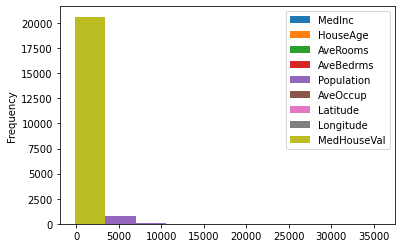

In [36]:
housing_df.plot(kind='hist')

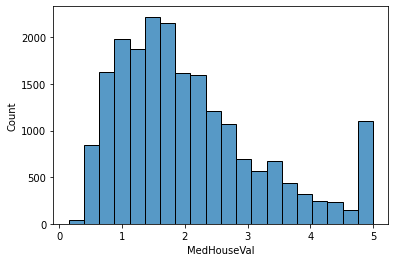

In [37]:
# 주택 가격 중앙값(타겟)의 분포
sns.histplot(x='MedHouseVal', data=housing_df, bins=20)
plt.show()

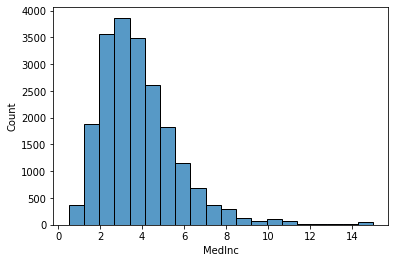

In [38]:
# 소득 중앙값 분포
sns.histplot(x='MedInc', data=housing_df, bins=20)
plt.show()

In [39]:
#sns.pairplot(data=housing_df)
#plt.show()

## latitude(위도), longitude(경도) 산점도

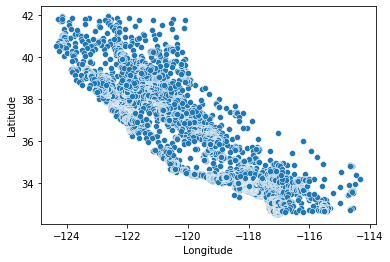

In [40]:
sns.scatterplot(x='Longitude', y='Latitude', data=housing_df)
plt.show()

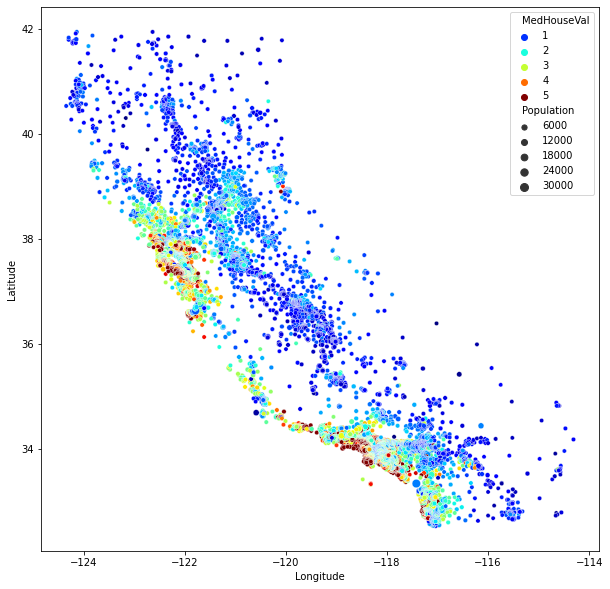

In [41]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='Longitude', y='Latitude', data=housing_df,
                size='Population', hue='MedHouseVal', palette=plt.get_cmap('jet'))
plt.show()

## Train/Test split

In [42]:
X, y = housing.data, housing.target

In [43]:
X.shape, y.shape

((20640, 8), (20640,))

In [44]:
X[:3]

array([[ 8.32520000e+00,  4.10000000e+01,  6.98412698e+00,
         1.02380952e+00,  3.22000000e+02,  2.55555556e+00,
         3.78800000e+01, -1.22230000e+02],
       [ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,
         9.71880492e-01,  2.40100000e+03,  2.10984183e+00,
         3.78600000e+01, -1.22220000e+02],
       [ 7.25740000e+00,  5.20000000e+01,  8.28813559e+00,
         1.07344633e+00,  4.96000000e+02,  2.80225989e+00,
         3.78500000e+01, -1.22240000e+02]])

In [45]:
y[:3]

array([4.526, 3.585, 3.521])

In [46]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y,
                                          test_size=0.2,
                                          random_state=42)

In [47]:
X_tr.shape, X_te.shape, y_tr.shape, y_te.shape

((16512, 8), (4128, 8), (16512,), (4128,))

# SGD Regreesor

In [48]:
# 모델 생성
model = Pipeline([('scaler', StandardScaler()),
                  ('reg', SGDRegressor())])

In [49]:
model.fit(X_tr, y_tr)

Pipeline(steps=[('scaler', StandardScaler()), ('reg', SGDRegressor())])

In [50]:
model['reg'].coef_

array([ 0.77547913,  0.10981594, -0.12763484,  0.18761843,  0.00842472,
       -0.25195726, -1.01838715, -0.98603989])

In [51]:
model['reg'].intercept_

array([2.08347781])

In [52]:
print('train r2: ', model.score(X_tr, y_tr))
print('test r2: ', model.score(X_te, y_te))

train r2:  0.5750933876631472
test r2:  0.5865546222196825


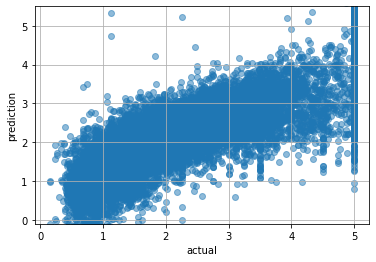

In [53]:
# 훈련 셋에서 예측값(y축) ~ 실젯값(x축) 산점도
tr_pred = model.predict(X_tr)
plt.scatter(y_tr, tr_pred, alpha=0.5)
plt.grid()
plt.xlabel('actual')
plt.ylabel('prediction')
plt.ylim((-0.1, 5.5))
plt.show()

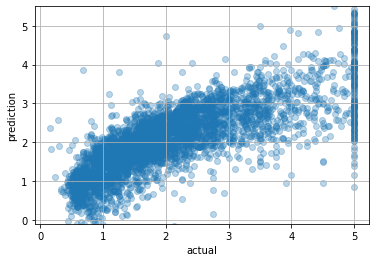

In [54]:
# 테스트 셋에서의 예측값과 실젯값 비교
te_pred = model.predict(X_te)
plt.scatter(y_te, te_pred, alpha=0.3)
plt.grid()
plt.xlabel('actual')
plt.ylabel('prediction')
plt.ylim((-0.1, 5.5))
plt.show()

## LinearRegression

In [55]:
model1 = Pipeline([('scaler', StandardScaler() ),
                  ('reg', LinearRegression() )])

In [56]:
model1.fit(X_tr, y_tr)

Pipeline(steps=[('scaler', StandardScaler()), ('reg', LinearRegression())])

In [57]:
print('train r2 :', model1.score(X_tr, y_tr))
print('test r2 :', model1.score(X_te, y_te))
if model1.score(X_tr, y_tr) > model1.score(X_te, y_te):
    print("과대적합")
else:
    print("과소적합")

train r2 : 0.6125511913966952
test r2 : 0.575787706032451
과대적합


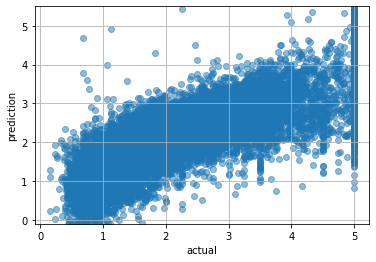

In [58]:
# 훈련 셋에서 예측값(y축) ~ 실젯값(x축) 산점도
tr_pred1 = model1.predict(X_tr)
plt.scatter(y_tr, tr_pred1, alpha=0.5)
plt.grid()
plt.xlabel('actual')
plt.ylabel('prediction')
plt.ylim((-0.1, 5.5))
plt.show()

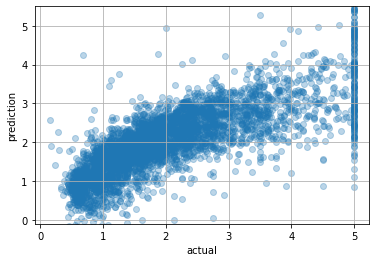

In [59]:
# 테스트 셋에서의 예측값과 실젯값 비교
te_pred1 = model1.predict(X_te)
plt.scatter(y_te, te_pred1, alpha=0.3)
plt.grid()
plt.xlabel('actual')
plt.ylabel('prediction')
plt.ylim((-0.1, 5.5))
plt.show()

## Lasso(`l1`)

In [60]:
model2 = Pipeline([('scaler', StandardScaler() ),
                  ('reg', Lasso(alpha=0.001) )])
model2.fit(X_tr, y_tr)

Pipeline(steps=[('scaler', StandardScaler()), ('reg', Lasso(alpha=0.001))])

In [61]:
print('train r2 :', model2.score(X_tr, y_tr))
print('test r2 :', model2.score(X_te, y_te))
if model2.score(X_tr, y_tr) > model2.score(X_te, y_te):
    print("과대적합")
else:
    print("과소적합")

train r2 : 0.6125094085909122
test r2 : 0.576856256870568
과대적합


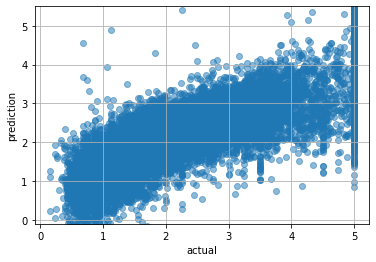

In [62]:
# 훈련 셋에서 예측값(y축) ~ 실젯값(x축) 산점도
tr_pred2 = model2.predict(X_tr)
plt.scatter(y_tr, tr_pred2, alpha=0.5)
plt.grid()
plt.xlabel('actual')
plt.ylabel('prediction')
plt.ylim((-0.1, 5.5))
plt.show()

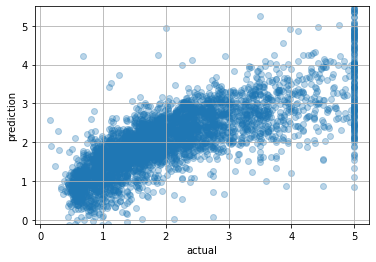

In [63]:
# 테스트 셋에서의 예측값과 실젯값 비교
te_pred2 = model2.predict(X_te)
plt.scatter(y_te, te_pred2, alpha=0.3)
plt.grid()
plt.xlabel('actual')
plt.ylabel('prediction')
plt.ylim((-0.1, 5.5))
plt.show()

## Ridge(`l2`)

In [64]:
model3 = Pipeline([('scaler', StandardScaler() ),
                  ('reg', Ridge() )])
model3.fit(X_tr, y_tr)

Pipeline(steps=[('scaler', StandardScaler()), ('reg', Ridge())])

In [65]:
print('train r2 :', model3.score(X_tr, y_tr))
print('test r2 :', model3.score(X_te, y_te))
if model3.score(X_tr, y_tr) > model3.score(X_te, y_te):
    print("과대적합")
else:
    print("과소적합")

train r2 : 0.6125511218634558
test r2 : 0.575815742891368
과대적합


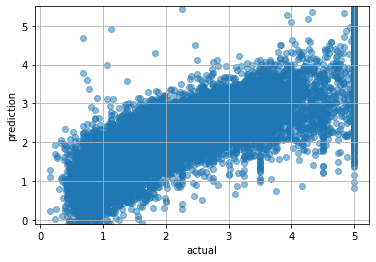

In [66]:
# 훈련 셋에서 예측값(y축) ~ 실젯값(x축) 산점도
tr_pred3 = model3.predict(X_tr)
plt.scatter(y_tr, tr_pred3, alpha=0.5)
plt.grid()
plt.xlabel('actual')
plt.ylabel('prediction')
plt.ylim((-0.1, 5.5))
plt.show()

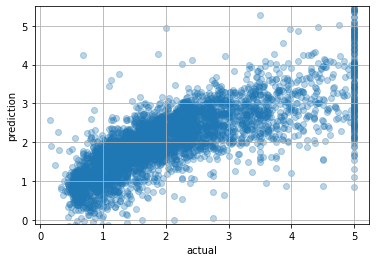

In [67]:
# 테스트 셋에서의 예측값과 실젯값 비교
te_pred3 = model3.predict(X_te)
plt.scatter(y_te, te_pred3, alpha=0.3)
plt.grid()
plt.xlabel('actual')
plt.ylabel('prediction')
plt.ylim((-0.1, 5.5))
plt.show()

## ElasticNet

In [68]:
model4 = Pipeline([('scaler', StandardScaler() ),
                  ('reg', ElasticNet(alpha=0.001) )])
model4.fit(X_tr, y_tr)

Pipeline(steps=[('scaler', StandardScaler()), ('reg', ElasticNet(alpha=0.001))])

In [69]:
print('train r2 :', model4.score(X_tr, y_tr))
print('test r2 :', model4.score(X_te, y_te))
if model4.score(X_tr, y_tr) > model4.score(X_te, y_te):
    print("과대적합")
else:
    print("과소적합")

train r2 : 0.612523992704171
test r2 : 0.5765432059227724
과대적합


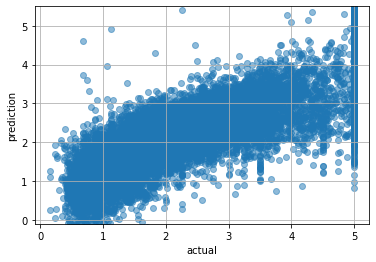

In [70]:
# 훈련 셋에서 예측값(y축) ~ 실젯값(x축) 산점도
tr_pred4 = model4.predict(X_tr)
plt.scatter(y_tr, tr_pred4, alpha=0.5)
plt.grid()
plt.xlabel('actual')
plt.ylabel('prediction')
plt.ylim((-0.1, 5.5))
plt.show()

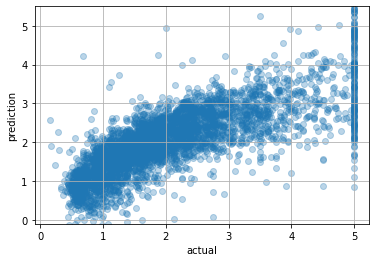

In [71]:
# 테스트 셋에서의 예측값과 실젯값 비교
te_pred4 = model4.predict(X_te)
plt.scatter(y_te, te_pred4, alpha=0.3)
plt.grid()
plt.xlabel('actual')
plt.ylabel('prediction')
plt.ylim((-0.1, 5.5))
plt.show()